### Step 1. generate the imputed dataset
```bash
python dataset/generate_data_with_stimp.py --area Chesapeake
```

### Step 2. train STIMP prediction function and baselines
#### 1) train STIMP prediction
```bash
for i in {0..9}  
do  
python prediction/train.py --index $i --area Chesapeake
done
```
#### 2) train baselines
```bash
python prediction/train_without_spatial_imputation.py --method "CrossFormer" --area Chesapeake
python prediction/train_without_spatial_imputation.py --method "iTransformer" --area Chesapeake
python prediction/train_without_spatial_imputation.py --method "TSMixer" --area Chesapeake
python prediction/train_without_imputation.py --method "MTGNN" --area Chesapeake
python prediction/train_as_image_without_imputation.py --method "PredRNN" --area Chesapeake
python prediction/train_xgboost_without_imputation.py --area Chesapeake
```


In [4]:
import h5py
import scipy
import numpy as np
import torch
base_dir = "../log/prediction/Chesapeake/"
label = np.load("../data/Chesapeake/trues.npy")
label_masks = np.load("../data/Chesapeake/true_masks.npy")

In [2]:
def load(path):
    path = path + "/with_imputation"
    preds = []
    for i in range(10):
        preds.append(np.load(path+"/prediction_{}.npy".format(i)))
    return np.stack(preds, axis=1)

In [3]:
prediction_xg = load(base_dir+"XGBoost")
prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_our = load(base_dir+"STIMP")
prediction_our_wo = np.load(base_dir+"STIMP/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = load(base_dir+"MTGNN")
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = load(base_dir+"TSMixer")
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = load(base_dir+"CrossFormer")
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_iTransformer = load(base_dir+"iTransformer")
prediction_iTransformer_wo = np.load(base_dir+"iTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_predrnn = load(base_dir+"PredRNN")
prediction_predrnn_wo = np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True)

**process the predictions**

In [5]:
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_wo = torch.from_numpy(prediction_our_wo).squeeze()
prediction_xg = torch.from_numpy(prediction_xg).squeeze().median(1).values
prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze().median(1).values
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze().median(1).values
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze().median(1).values
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()
prediction_iTransformer = torch.from_numpy(prediction_iTransformer).squeeze().median(1).values
prediction_iTransformer_wo = torch.from_numpy(prediction_iTransformer_wo).squeeze()
prediction_predrnn = torch.from_numpy(prediction_predrnn).squeeze().median(1).values
prediction_predrnn_wo = torch.from_numpy(prediction_predrnn_wo).squeeze()

In [6]:
mse_our= (((prediction_our.mean(1)- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our))
mse_our_wo = (((prediction_our_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our_wo))

mse_xg = (((prediction_xg - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_xg))
mse_xg_wo = (((prediction_xg_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_xg_wo))

mse_tsmixer = (((prediction_tsmixer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_tsmixer))
mse_tsmixer_wo = (((prediction_tsmixer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_tsmixer_wo))

mse_crossformer = (((prediction_crossformer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_crossformer))
mse_crossformer_wo = (((prediction_crossformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mse_mtgnn = (((prediction_mtgnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_mtgnn))
mse_mtgnn_wo = (((prediction_mtgnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_mtgnn_wo))

mse_iTransformer = (((prediction_iTransformer - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_iTransformer))
mse_iTransformer_wo = (((prediction_iTransformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_iTransformer_wo))

mse_predrnn = (((prediction_predrnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_predrnn))
mse_predrnn_wo = (((prediction_predrnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_predrnn_wo))


0.031243028
0.037361868
0.04303540280785233
0.04946128989436908
0.03521613
0.051664095
0.034954812
0.03999307
0.05151589
0.03329488
0.052918386
0.03455785
0.036896016


In [7]:
mse_our[mse_our==0]=np.nan
mse_our_wo[mse_our_wo==0]=np.nan
mse_xg_wo[mse_xg_wo==0]=np.nan
mse_xg[mse_xg==0]=np.nan
mse_crossformer_wo[mse_crossformer_wo==0]=np.nan
mse_crossformer[mse_crossformer==0]=np.nan
mse_mtgnn_wo[mse_mtgnn_wo==0]=np.nan
mse_mtgnn[mse_mtgnn==0]=np.nan
mse_tsmixer_wo[mse_tsmixer_wo==0]=np.nan
mse_tsmixer[mse_tsmixer==0]=np.nan
mse_iTransformer_wo[mse_iTransformer_wo==0]=np.nan
mse_iTransformer[mse_iTransformer==0]=np.nan
mse_predrnn_wo[mse_predrnn_wo==0]=np.nan
mse_predrnn[mse_predrnn==0]=np.nan

**Supplementary Fig 4c**

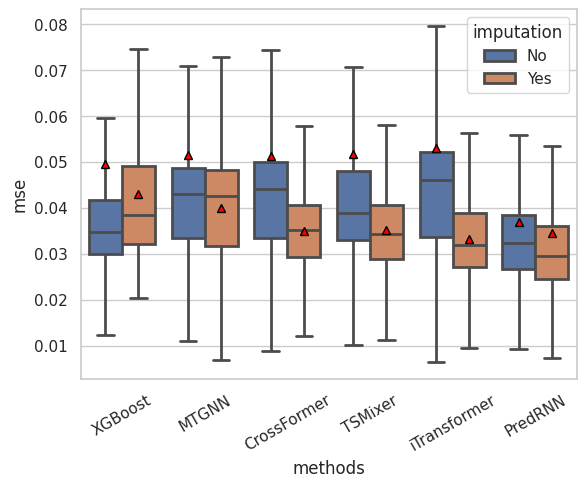

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
num_nodes = prediction_our.shape[-1]
category = []
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
imputation = []
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])

data = {'mse': np.concatenate([mse_xg_wo.numpy(), mse_xg.numpy(), mse_mtgnn_wo.numpy(), mse_mtgnn.numpy(), mse_crossformer_wo.numpy(), mse_crossformer.numpy(), mse_tsmixer_wo.numpy(), mse_tsmixer.numpy(), mse_iTransformer_wo.numpy(), mse_iTransformer.numpy(), mse_predrnn_wo.numpy(), mse_predrnn.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mse', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

**Supplementary Fig 2c**

['#96ABDC', '#9EC5CC', '#BFDAB6', '#F1CFB0', '#4E5E7B', '#80AE6B', '#F8766D']


/tmp/ipykernel_1603066/3314274250.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x='methods', y='mse', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={


([], [])

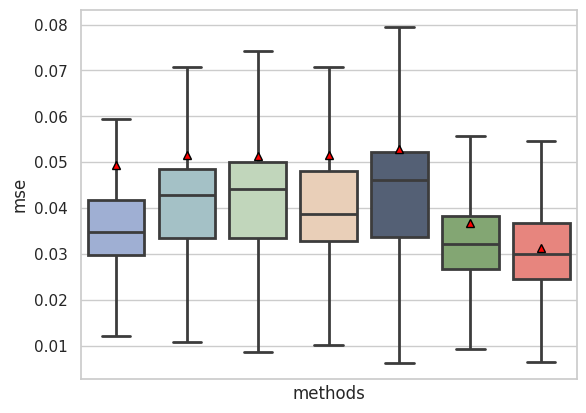

In [9]:
import pandas as pd
import numpy as np
category = []
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
category.extend(['Our' for i in range(num_nodes)])
data = {'mse': np.concatenate([mse_xg_wo.numpy(), mse_mtgnn_wo.numpy(), mse_crossformer_wo.numpy(), mse_tsmixer_wo.numpy(), mse_iTransformer_wo.numpy(), mse_predrnn_wo.numpy(),  mse_our.numpy()],0),
        'methods':category}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
color = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC"][::-1]
print(color)
g = sns.boxplot(x='methods', y='mse', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})
plt.xticks([])

In [10]:
mae_our= ((np.abs(prediction_our.mean(1)- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our))
mae_our_wo = ((np.abs(prediction_our_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our_wo))

mae_xg = ((np.abs(prediction_xg - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg))
mae_xg_wo = ((np.abs(prediction_xg_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg_wo))

mae_tsmixer = ((np.abs(prediction_tsmixer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer))
mae_tsmixer_wo = ((np.abs(prediction_tsmixer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer_wo))

mae_crossformer = ((np.abs(prediction_crossformer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer))
mae_crossformer_wo = ((np.abs(prediction_crossformer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer_wo))

mae_mtgnn = ((np.abs(prediction_mtgnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn))
mae_mtgnn_wo = ((np.abs(prediction_mtgnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn_wo))

mae_iTransformer = ((np.abs(prediction_iTransformer - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer))
mae_iTransformer_wo = ((np.abs(prediction_iTransformer_wo- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer_wo))

mae_predrnn = ((np.abs(prediction_predrnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn))
mae_predrnn_wo = ((np.abs(prediction_predrnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn_wo))

0.13298668
0.14293854
0.16022755321202545
0.15952552552646165
0.14120443
0.16375047
0.14133285
0.1651266
0.15237038
0.16508904
0.13803342
0.16772293
0.1374197
0.14234453


In [11]:
mae_our[mae_our==0]=np.nan
mae_our_wo[mae_our_wo==0]=np.nan
mae_xg_wo[mae_xg_wo==0]=np.nan
mae_xg[mae_xg==0]=np.nan
mae_crossformer_wo[mae_crossformer_wo==0]=np.nan
mae_crossformer[mae_crossformer==0]=np.nan
mae_mtgnn_wo[mae_mtgnn_wo==0]=np.nan
mae_mtgnn[mae_mtgnn==0]=np.nan
mae_tsmixer_wo[mae_tsmixer_wo==0]=np.nan
mae_tsmixer[mae_tsmixer==0]=np.nan
mae_iTransformer_wo[mae_iTransformer_wo==0]=np.nan
mae_iTransformer[mae_iTransformer==0]=np.nan
mae_predrnn_wo[mae_predrnn_wo==0]=np.nan
mae_predrnn[mae_predrnn==0]=np.nan

**Supplementary Fig 4c**

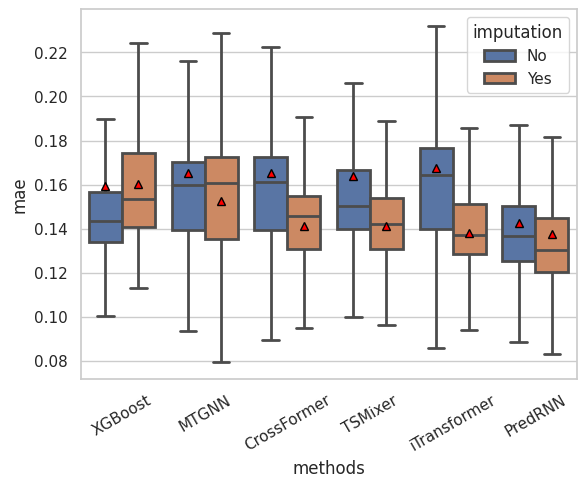

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
category = []
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])

imputation = []
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])
imputation.extend(['No' for i in range(num_nodes)])
imputation.extend(['Yes' for i in range(num_nodes)])

data = {'mae': np.concatenate([mae_xg_wo.numpy(), mae_xg.numpy(), mae_mtgnn_wo.numpy(), mae_mtgnn.numpy(), mae_crossformer_wo.numpy(), mae_crossformer.numpy(), mae_tsmixer_wo.numpy(), mae_tsmixer.numpy(), mae_iTransformer_wo.numpy(), mae_iTransformer.numpy(), mae_predrnn_wo.numpy(), mae_predrnn.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)



plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mae', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

**Fig 2b Chesapeake Bay**

([], [])

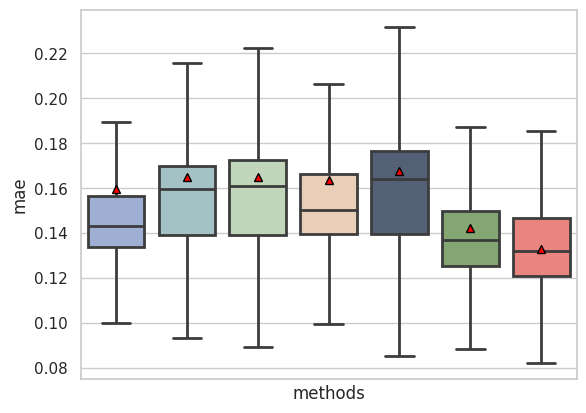

In [13]:
import pandas as pd
import numpy as np
category = []
category.extend(['XGBoost' for i in range(num_nodes)])
category.extend(['MTGNN' for i in range(num_nodes)])
category.extend(['CrossFormer' for i in range(num_nodes)])
category.extend(['TSMixer' for i in range(num_nodes)])
category.extend(['iTransformer' for i in range(num_nodes)])
category.extend(['PredRNN' for i in range(num_nodes)])
category.extend(['Our' for i in range(num_nodes)])
data = {'mae': np.concatenate([mae_xg_wo.numpy(), mae_mtgnn_wo.numpy(), mae_crossformer_wo.numpy(), mae_tsmixer_wo.numpy(), mae_iTransformer_wo.numpy(), mae_predrnn_wo.numpy(),  mae_our.numpy()],0),
        'methods':category}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
# color= sns.color_palette()[:7][::-1]
color = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC"][::-1]

g = sns.boxplot(data=data, x='methods', y='mae', hue="methods", linewidth=2, showfliers=False,showmeans=True,palette=color, meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})
# g.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
plt.xticks([])

**Fig 4e PredRNN**

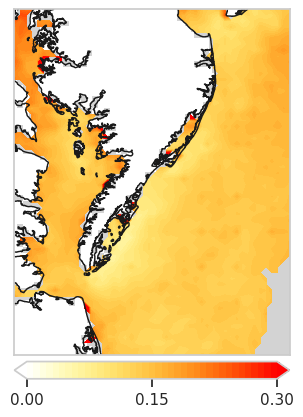

In [16]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np
from cmap import Colormap

cm = Colormap('vispy:fire').to_mpl()  # case insensitive
is_sea = np.load("../data/Chesapeake/is_sea.npy")
H, W = is_sea.shape
mae_xg_sp = deepcopy(mae_predrnn_wo.numpy())
tmp = np.zeros((H,W))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_xg_sp

lon = np.load("../data/Chesapeake/lon.npy")
lati = np.load("../data/Chesapeake/lati.npy")


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.3, 40),cmap=cm,extend='both')

map.colorbar(boundaries=np.linspace(0, 0.3, 100), ticks=np.linspace(0, 0.3, 3),location='bottom')

**Fig 4e STIMP**

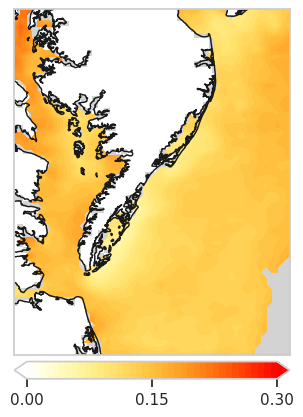

In [17]:
mae_our_sp = deepcopy(mae_our.numpy())
tmp = np.zeros((H,W))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_our_sp

map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.3, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.3, 100), ticks=np.linspace(0, 0.3, 3),location='bottom')

**Fig 4e improvement**

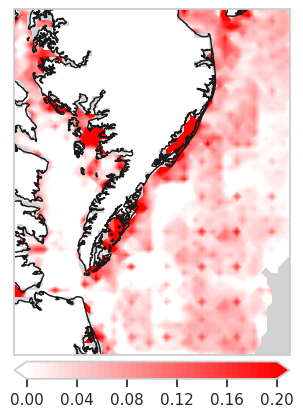

In [18]:
cm = Colormap('chrisluts:I_Red').to_mpl()
improvement =  (mae_predrnn_wo.numpy() - mae_our.numpy())/mae_predrnn_wo.numpy()
tmp = np.zeros((H,W))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= improvement

map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.2, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.2, 100), ticks=np.linspace(0, 0.2, 6),location="bottom")